# 1. Definition
A **multi-class classification** is a *classification technique that allows us to categorize data* with **more than two class labels.**

**Logistic regression** is a statistical method used for **binary classification,** which predicts the probability that a given input belongs to **one of two possible categories.** When dealing with **multiclass classification,** where there are **more than two classes,** logistic regression can be extended using techniques such as:

# Load the digit data base from *sklearn* library
## Each datapoint is a 8x8 image of a digit.

### from pixel_0_0 to pixel_0_7 like that
#### pixel_1_0 to pixel_1_7
#### . . .
#### pixel_7_0 to pixel_7_7


In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
len(digits.feature_names)

64

In [ ]:
len(digits.data)

1797

In [ ]:
len(digits.target)

1797

In [ ]:
len(digits.target_names)

10

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

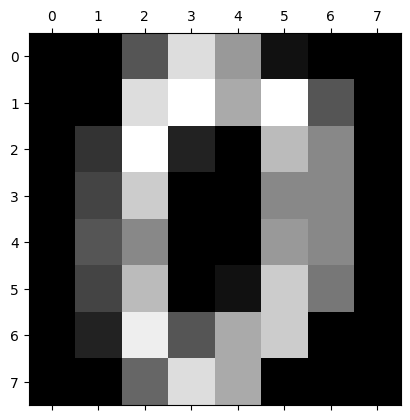

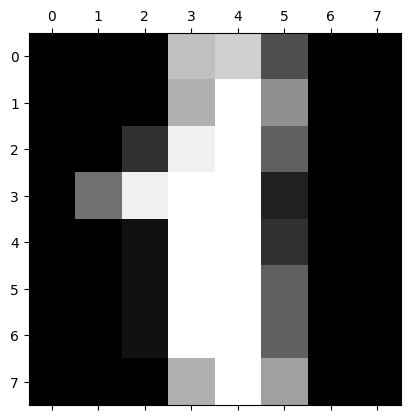

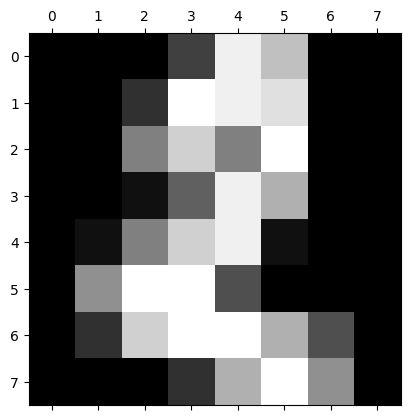

In [ ]:
%matplotlib inline
for i in range(3):
  plt.matshow(digits.images[i])

<Figure size 640x480 with 0 Axes>

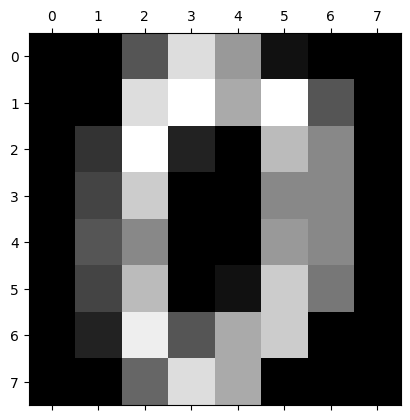

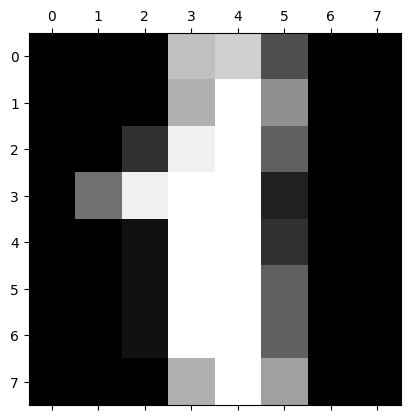

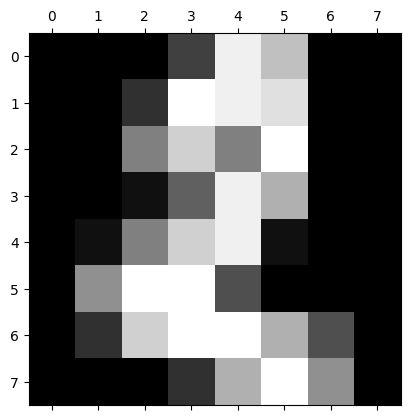

In [ ]:
plt.gray()
for i in range(3):
  plt.matshow(digits.images[i])

In [ ]:
#for i in range(3):
digits.target[0:3]

array([0, 1, 2])

## Create and train the dataset using Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [ ]:
len(X_train)

1347

In [ ]:
len(X_test)

450

In [ ]:
X_train[0:3]

array([[ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,
         4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2.,
        16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
         0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16.,
        14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.],
       [ 0.,  0.,  7., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,
         1.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        12., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,
         0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  1., 14., 16.,
        16.,  1.,  0.,  0.,  0.,  0.,  4., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,
         0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8.,
        16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6., 11., 16.,  7.,
         0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  

In [ ]:
y_train[0:3]

array([6, 1, 4])

In [ ]:
X_test[0:3]

array([[ 0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0.,  8., 12., 16., 16.,
        13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0.,
        15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 11.,  9.,  2.,  0.,
         0.,  0.,  0.,  1.,  7., 15., 13.,  2.,  0.,  0.,  0.,  3.,  4.,
         7., 16., 10.,  0.,  0.,  2., 11., 15., 11.,  8.,  2.,  0.],
       [ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8.,
        15.,  0.,  0.,  0.,  2., 16.,  3.,  0., 13.,  2.,  0.,  0.,  5.,
        15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,  0., 10.,  5.,
         0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10.,
        11., 11.,  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.],
       [ 0.,  0.,  7., 15., 15.,  2.,  0.,  0.,  0.,  0., 13.,  6., 12.,
         6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,
         0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,
         0.,  0.,  3.,  7.,  0.,  2., 15.,  1.,  0.,  0.,  

In [ ]:
y_test[0:3]

array([3, 0, 3])

In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
digits.target[0:3]

array([0, 1, 2])

In [ ]:
digits.target_names[0:3]

array([0, 1, 2])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(X_test)

array([8, 0, 3, 6, 2, 7, 9, 2, 2, 0, 4, 4, 2, 1, 8, 9, 9, 8, 1, 4, 5, 0,
       5, 6, 7, 6, 2, 0, 2, 1, 3, 6, 9, 7, 6, 6, 5, 4, 8, 6, 8, 2, 8, 8,
       9, 9, 4, 7, 1, 7, 2, 2, 2, 4, 7, 7, 7, 4, 9, 3, 2, 2, 6, 2, 2, 3,
       9, 1, 6, 7, 3, 4, 7, 1, 3, 8, 7, 9, 2, 0, 4, 1, 6, 8, 1, 6, 9, 6,
       2, 0, 8, 1, 8, 3, 0, 5, 9, 1, 5, 6, 4, 3, 8, 9, 1, 3, 4, 4, 8, 1,
       9, 4, 8, 7, 5, 5, 0, 5, 6, 9, 9, 4, 0, 4, 8, 1, 0, 7, 2, 3, 7, 1,
       1, 2, 6, 0, 9, 1, 8, 1, 0, 1, 8, 5, 2, 1, 8, 4, 0, 4, 9, 3, 9, 4,
       3, 9, 4, 3, 0, 6, 7, 8, 5, 3, 8, 7, 5, 4, 1, 6, 9, 8, 2, 6, 7, 3,
       6, 5, 5, 6, 6, 9, 8, 6, 6, 8, 7, 9, 7, 5, 2, 5, 7, 3, 0, 1, 9, 3,
       2, 2, 5, 2, 2, 6, 0, 1, 3, 8, 3, 9, 4, 5, 8, 3, 7, 9, 3, 8, 7, 2,
       5, 5, 0, 4, 0, 2, 3, 6, 1, 5, 6, 7, 9, 8, 8, 5, 3, 6, 6, 5, 7, 9,
       5, 2, 2, 4, 1, 1, 7, 6, 3, 0, 8, 3, 1, 1, 0, 6, 2, 9, 7, 7, 2, 8,
       3, 1, 6, 8, 8, 7, 6, 4, 6, 5, 1, 5, 8, 4, 1, 7, 8, 4, 2, 1, 9, 5,
       1, 6, 1, 8, 7, 4, 4, 9, 1, 5, 2, 5, 0, 1, 2,

In [ ]:
model.score(X_test, y_test)

0.9533333333333334

In [ ]:
model.predict([digits.data[2]])

array([2])

In [ ]:
model.predict(digits.data[0:3])

array([0, 1, 2])

In [ ]:
y_pred = model.predict(X_test)

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  1,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 44,  0,  1],
       [ 0,  1,  0,  0,  1,  2,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 44]])

In [ ]:
import seaborn as sb

Text(95.72222222222221, 0.5, 'True')

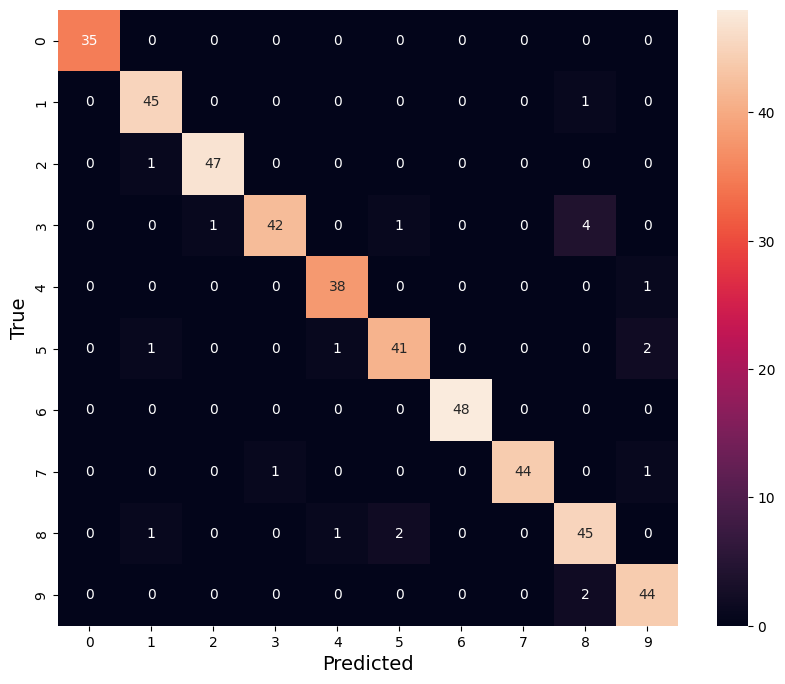

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)